<a href="https://colab.research.google.com/github/aman-garg0001/Face-Recognition/blob/main/face_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using CNN
## Importing necessary libraries

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

## Importing pretrained InceptionV3 model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                               include_top = False,
                               weights = "imagenet")

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

## Summary of the model

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

## Adding custom trainable layers to the model and training it.

In [ ]:
last_layer = pre_trained_model.get_layer('mixed9')
last_output = last_layer.output

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation = 'sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing dataset from Google Drive

In [ ]:
path_to_train = '/content/drive/MyDrive/Face_Recognition/Known_Faces'
batch_size = 32

In [ ]:
Generator = ImageDataGenerator(validation_split=0.2)
train_generator = Generator.flow_from_directory(path_to_train, (150, 150), batch_size=batch_size, subset = 'training')
validation_generator = Generator.flow_from_directory(path_to_train, (150, 150), batch_size=batch_size, subset = "validation")

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


## Training model.

In [ ]:
callbacks = myCallback()
model.fit_generator(train_generator, epochs = 10, validation_data = validation_generator, callbacks = [callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
51/51 [==============================] - 745s 14s/step - loss: 9.3621 - acc: 0.8180 - val_loss: 1.8960 - val_acc: 0.8900
Epoch 2/10
51/51 [==============================] - 5s 100ms/step - loss: 1.0943 - acc: 0.9618 - val_loss: 4.7173 - val_acc: 0.8525

Reached 97.0% accuracy so cancelling training!


## Saving trained model into Google Drive

In [ ]:
model.save("face_reco.h5")

## Testing the treained model on an image

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Face_Recognition/face_reco.h5')

In [ ]:
img = '/content/drive/MyDrive/Face_Recognition/Unknown_Faces/IMG_20181214_195826.jpg'

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np

In [ ]:
arr = ['aman', 'govind']
!cd /content/drive/MyDrive/Face_Recognition

## Loading input image

[]

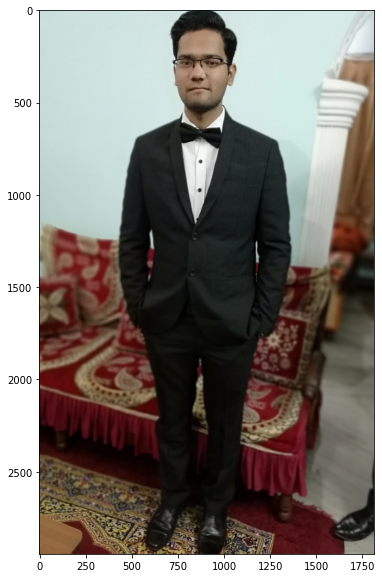

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
pict = cv2.imread('/content/drive/MyDrive/Face_Recognition/Unknown_Faces/IMG_20181214_195826.jpg')
plt.figure(figsize = (10, 10))
plt.imshow(cv2.cvtColor(pict, cv2.COLOR_BGR2RGB))
plt.plot()

## Extracting all faces in the input image and predicting on each face

[[8.8340110e-01 1.1001235e-12]]
aman


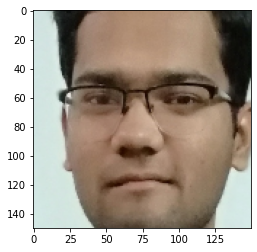

In [ ]:
path = '/content/drive/MyDrive/Face_Recognition/front_face.xml' # name of file with XML tags
faceCascade = cv2.CascadeClassifier(path)

img = cv2.imread('/content/drive/MyDrive/Face_Recognition/Unknown_Faces/IMG_20181214_195826.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=15,     
        minSize=(30, 30)
    )
count = 0
#print(faces.size)
for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        roi_color = cv2.resize(roi_color, (150, 150))
        roi_color = np.expand_dims(roi_color, axis=0)
        #print(roi_color.shape)
        plt.imshow(cv2.cvtColor(roi_color[0], cv2.COLOR_BGR2RGB))
        result = model.predict(roi_color)
        ans = result.argmax(axis=-1)
        print(result)
        print(arr[ans[0]])